# Plotting with `ggplot2` Practice 

In the lab, we touched on the basic components of creating a plot with `ggplot2`. Now we are going to put those techniques to practice as well as learn some new techniques for analyzing larger amounts of data.

### Histograms

Remember back in module 2 where we learned how to created histograms in base `R`? Well, with `ggplot2`, we can make those histograms more insightful (and prettier). 

We will start out simple. Let's create a histogram of the `Sepal.Width` variable form the `iris` data.

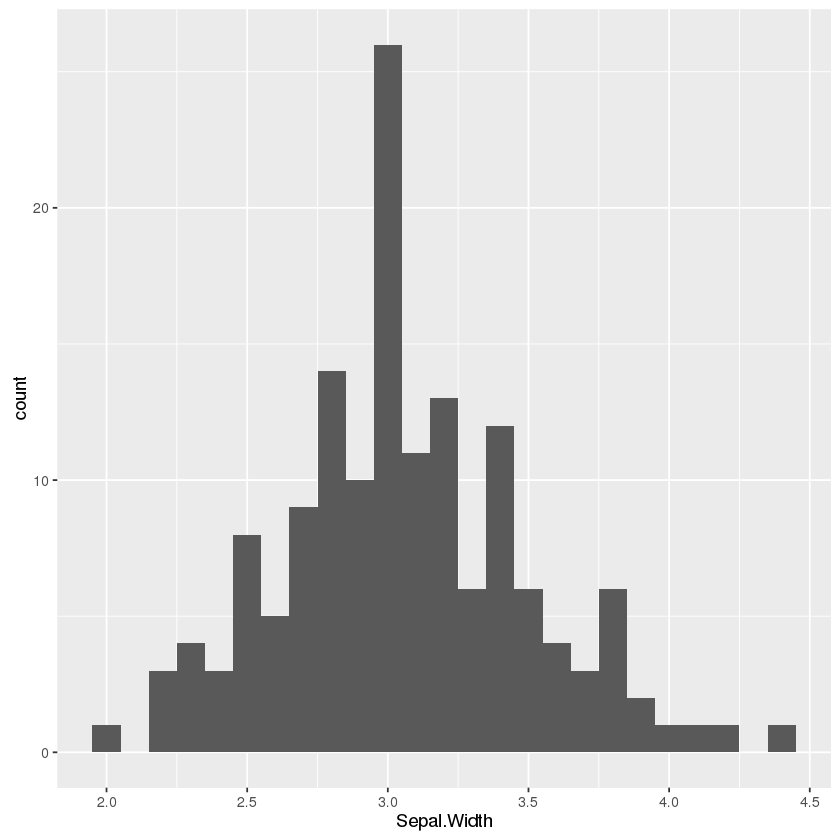

In [1]:
library(ggplot2) # don't forget to load in ggplot2
ggplot(data = iris, aes(Sepal.Width)) + geom_histogram(bins = 25)

This looks good! Notice how we specified the number of bins that we wanted for this histogram. Now let's add some color.

**Activity 1**: *Create a histogram in `ggplot2` and use color to partition the data by `Species`.*

In [2]:
# Code for Activity 1 goes here 
# *****************************





We can see here that the histogram is outlined in some different colors based on the distribution each species of iris. Honestly, this probably isn't the best way to represent this type of information as the dark gray really dominates the plot. Instead, we want to fill in those bins with color. `ggplot2` has a specific aesthetic for such a scenario called, most appropriately, `fill`.  Take a look at it in action below.

In [ ]:
ggplot(iris, aes(x = Sepal.Width, fill = Species)) +
  geom_histogram(bins = 25)

That looks better. But is there a better way to visualize each species' distribution? Perhaps in separate graphs?

**Activity 2**: *Using faceting to create individual histograms for each of the species.*

In [ ]:
# Code for Activity 2 goes here 
# ***************************** 





So now we should have three separate plots, with three separate histograms in order to visualize the distribution of each of the iris species. We can take this a step further. What if we wanted to know what the distribution of the rest of the data in comparison to each species for each graph?

Below is a technique that demonstrates the flexibility of `ggplot2` and the use of layers. What we are going to do here is use a full set of iris data and a partial set of the iris data. The partial set won't contain the fifth column, `Species` because we don't want faceting to apply to it. We will then conduct our business as usual with creating histograms with the full data, facet on `Species`, but we are going to add a layer from the partial data that will serve as a background layer to display the entire distribution of the `Sepal.Width`. This is as simple as specifying a new dataset within a single `geom_histogram()` function.

Take a look below.

In [ ]:
full <- iris        # Full data set
partial <- full[, -5]  # Background Data - full without the 5th column (Species)

ggplot(full, aes(x = Sepal.Width, fill = Species)) + # layer for partitioning by species
  geom_histogram(data = partial, fill = "grey", alpha = .5) + # background layer
  geom_histogram(bins = 25) + 
  facet_wrap(~ Species) + 
  guides(fill = FALSE) # remove the legends

## `diamonds` data

We will be working with another `ggplot2` dataset. The `diamonds` contains about 54,000 rows on several different measurements including depth, color, carat, cut, and price. Let's go ahead and take a look at the data.

In [ ]:
head(diamonds)

If your not a jeweler, and are unsure about some of these variables, here are some visual-aids.

<img src="../images/diamond.png" width = 250px>
<img src="../images/diamond_color.png">

We will start out simple...

**Activity 3**: *Create a histogram of the `carat` variable.*

In [ ]:
# Code for Activity 3 goes here 
# ***************************** 




We are going to start visualizing 2 dimensions. The first thing we are going to do is create a simple scatter plot between `carat` and `price`. Here's what we have...

In [ ]:
ggplot(data = diamonds, aes(x = carat, y = price)) + geom_point()

We are dealing with a lot more points here so it is hard to visualize just how many points are grouped in that lower left-hand corner of the plot. We need some other techniques in order to make this visualization more effective. 

Now, there are many ways we can actually do this, but today we are going to explore some other geoms.

**Activity 4**: *Create the plot above, except use the `bin2d()` geom instead of the `point()`.*

In [ ]:
# Code for Activity 4 goes here 
# ***************************** 





So imagine this as a 2-dimensional histogram. Each bin contains a certain number of points. The greater number of points, the lighter the color of the bin. In this way, we can get an idea of how many points are clustered where. 

We can do a similar technique but with hexagons...

In [ ]:
ggplot(data = diamonds, aes(x = carat, y = price)) + geom_hex()

...or we can visualize the 2-dimensional density..

In [ ]:
ggplot(data = diamonds, aes(x = carat, y = price)) + geom_density2d()

This plot shows where the concentrations of points are. You will notice that the scale is a little different than from the plots above. Remember that we can combine geoms and layers together. Let's see if we can do that here...

**Activity 5**: *Create a plot visualizing the relationship between `carat` and `price` with a layer displaying the `point()` and a second layer on top of that displaying the `density2d`*

In [ ]:
# Code for Activity 5 goes here 
# ***************************** 





## `ggplot2` and `dplyr`

One more little thing...you can actually add ggplot to your `dplyr` pipeline. With this combination, you can actually go from data manipulation straight to data visualization. We are going to go ahead and demonstrate by filtering on only those `cut`s that are "`Very Good`" and then creating the plot that is above...

In [ ]:
library(dplyr)

diamonds %>%
filter(cut == "Very Good") %>%
ggplot(aes(x = carat, y = price))+ geom_point() +geom_density2d()

Hopefully this is straightforward. One thing to notice is that we don't have to specify the `data` parameter. That's because the output of the line above it is piped as the data, so there is no need to specify it as an argument. As a result, what we have is the same plot that you created in **Activity 5** except only for those rows where the `cut` is "`Very Good`".

**Activity 6**: *Filter the data where `cut` is "`Good`", and then create histograms of `price` and facet the plots by `color`. So your end result will have 7 different histograms, one for each unique color in the dataset.*

In [ ]:
# Code for Activity 6 goes here 
# ***************************** 


